In [1]:
import numpy as np

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from typing import Union

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.01,
    class_sep=1.0,
    random_state=42
)

In [3]:
w, b = 0, 0

In [4]:
def sigmoid(z: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
  """
  Compute the sigmoid of z.

  Parameters:
  z: A scalar or numpy array of any size.

  Returns:
  The sigmoid of z.
  """
  return 1 / (1 + np.exp(-z))

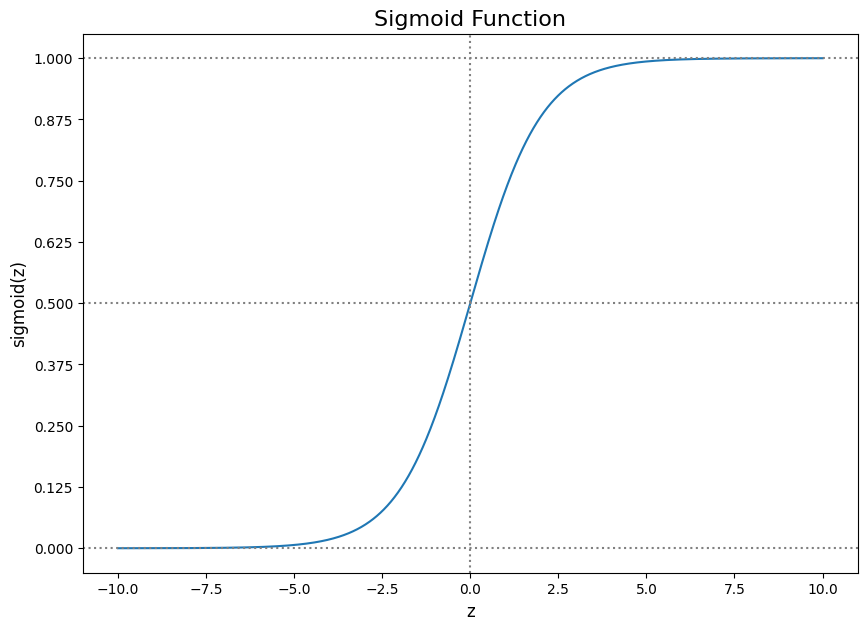

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(np.linspace(-10, 10, 1000), sigmoid(np.linspace(-10, 10, 1000)))
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.axhline(y=0.5, color='gray', linestyle='dotted')
plt.axhline(y=1, color='gray', linestyle='dotted')
plt.axvline(x=0, color='gray', linestyle='dotted')
plt.xlabel('z', fontsize=12)
plt.ylabel('sigmoid(z)', fontsize=12)
plt.title('Sigmoid Function', fontsize=16)
plt.yticks(np.linspace(0, 1, 9))
plt.show()

In [6]:
def logloss(w: float, b: float, X: np.ndarray, y: np.ndarray) -> float:
  """
  Computes the logistic regression log loss.

  Parameters:
  w: A scalar representing the weight
  b: A scalar representing the bias.
  X: A numpy array of input features.
  y: A numpy array of true labels.


  Returns:
  The log loss as a float.
  """
  y_pred = sigmoid(w * X + b)
  y_pred = y_pred.reshape(-1)
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10) # to prevent zero input in natural logarithm

  m = len(y)

  return -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [7]:
def accuracy_score(y, y_pred, threshold=0.5):
  """
  Calculate the accuracy of predictions.

  Parameters:
  y (numpy array): True labels.
  y_pred (numpy array): Predicted probabilities.
  threshold (float, optional): Threshold for converting predicted probabilities to binary labels. Default is 0.5.

  Returns:
  float: Accuracy of the predictions as the proportion of correctly predicted labels.
  """
  n_total = len(y)
  n_correct = ((y_pred.reshape(-1) >= threshold).astype(int) == y).sum()

  return n_correct / n_total

In [8]:
def weight_gradient(y, y_pred):
  """
  Calculate the gradient of the loss function with respect to the weights.

  Parameters:
  x (numpy array): True labels.
  y_pred (numpy array): Predicted probabilities.
  X (numpy array): Feature matrix.

  Returns:
  numpy array: Gradient of the loss with respect to the weights.
  """
  m = len(y)
  return -(1 / m) * np.sum((y - y_pred.reshape(-1)) * X.reshape(-1))

def bias_gradient(y, y_pred):
  """
  Calculate the gradient of the loss function with respect to the bias term.

  Parameters:
  y (numpy array): True labels.
  y_pred (numpy array): Predicted probabilities.

  Returns:
  float: Gradient of the loss with respect to the bias.
  """
  m = len(y)
  return -(1 / m) * np.sum(y - y_pred.reshape(-1))

In [9]:
# Before training
w, b = -100, 100
y_pred = sigmoid(w * X + b)

print(f'Weight: {w}')
print(f'Bias: {b}')
print(f'Accuracy: {accuracy_score(y, y_pred) * 100:.2f}%')

Weight: -100
Bias: 100
Accuracy: 25.50%


In [10]:
w, b = -100, 100

n_iterations = 10000
learning_rate = 0.1
losses = []
accuracies = []

for _ in range(n_iterations):
  losses.append(logloss(w, b, X, y))
  y_pred = sigmoid(w * X + b)
  accuracies.append(accuracy_score(y, y_pred))
  w -= learning_rate * weight_gradient(y, y_pred)
  b -= learning_rate * bias_gradient(y, y_pred)

In [11]:
# After training
print(f'Weight: {w}')
print(f'Bias: {b}')
print(f'Accuracy: {accuracy_score(y, y_pred) * 100:.2f}%')

Weight: 4.5226373971928835
Bias: 0.3965755990834293
Accuracy: 90.70%


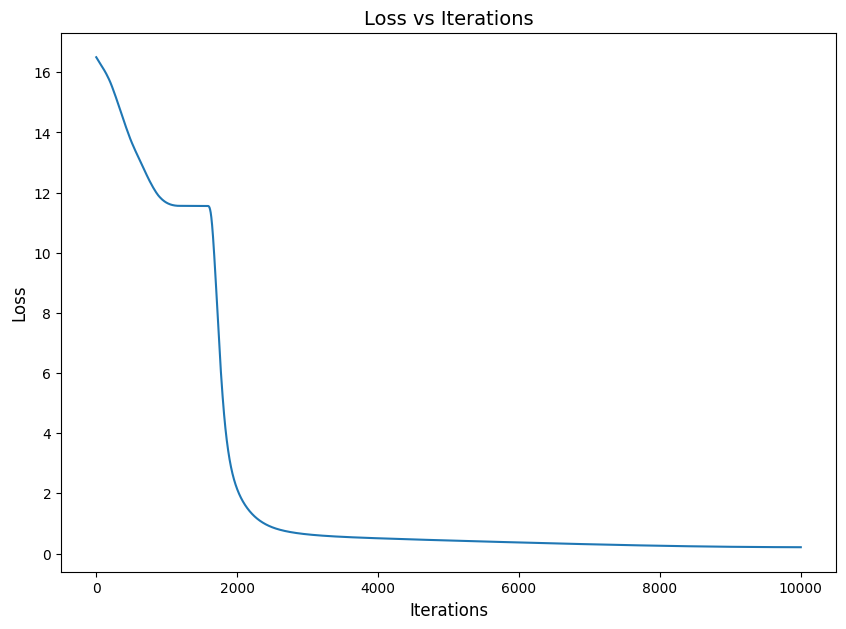

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(range(len(losses)), losses)
plt.title('Loss vs Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Iterations', fontsize=12)
plt.show()

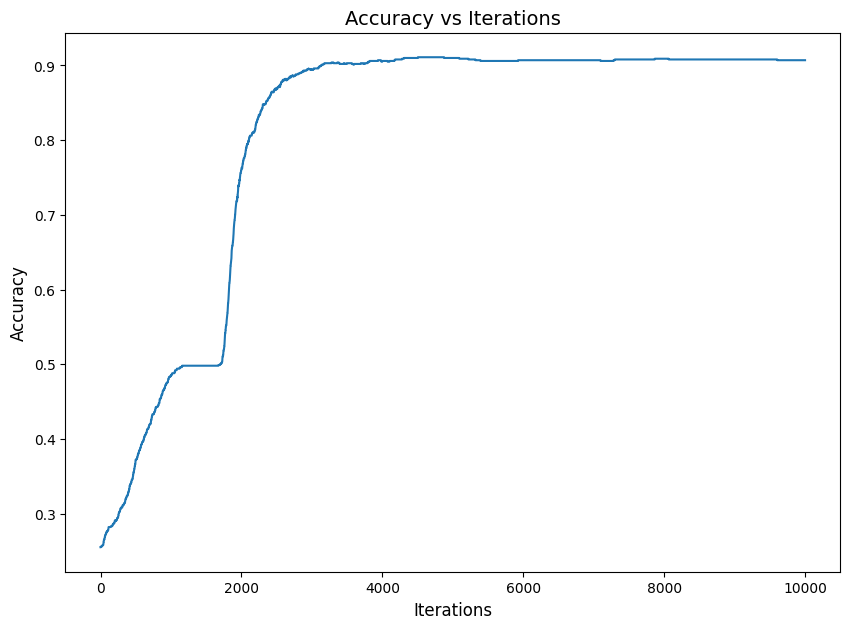

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(range(len(accuracies)), accuracies)
plt.title('Accuracy vs Iterations', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Iterations', fontsize=12)
plt.show()

In [14]:
class LogisticRegressionV0:

  def __init__(self, learning_rate=0.001, n_iterations=1000):
    self.w = np.random.randn()
    self.b = np.random.randn()
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
    self.losses = []
    self.accuracies  = []

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def logloss(self, X: np.ndarray, y: np.ndarray) -> float:
    y_pred = self.sigmoid(self.w * X + self.b)
    y_pred = y_pred.reshape(-1)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10) # to prevent zero input in natural logarithm
    m = len(y)

    return -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

  def accuracy_score(self, y, y_pred, threshold=0.5):
    n_total = len(y)
    n_correct = ((y_pred.reshape(-1) >= threshold).astype(int) == y).sum()

    return n_correct / n_total

  def weight_gradient(self, y, y_pred, X):
    m = len(y)
    return -(1 / m) * np.sum((y - y_pred.reshape(-1)) * X.reshape(-1))

  def bias_gradient(self, y, y_pred):
    m = len(y)
    return -(1 / m) * np.sum(y - y_pred.reshape(-1))

  def fit(self, X, y):
    for _ in range(self.n_iterations):
      y_pred = self.sigmoid(self.w * X + self.b)
      self.losses.append(self.logloss(X, y))
      self.accuracies.append(self.accuracy_score(y, y_pred))
      self.w -= self.learning_rate * self.weight_gradient(y, y_pred, X)
      self.b -= self.learning_rate * self.bias_gradient(y, y_pred)

  def predict(self, X, threshold=0.5):
    y_pred = self.sigmoid(self.w * X + self.b)
    y_pred = y_pred.reshape(-1)

    return (y_pred >= threshold).astype(int)

  def predict_probs(self, X):
    return self.sigmoid(self.w * X + self.b)

  def plot_loss_curve(self):
    plt.figure(figsize=(10, 7))
    plt.plot(range(len(self.losses)), self.losses)
    plt.title('Loss vs Iterations', fontsize=14)
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.show()

  def plot_accuracy_curve(self):
    plt.figure(figsize=(10, 7))
    plt.plot(range(len(self.accuracies)), self.accuracies)
    plt.title('Accuracy vs Iterations', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.show()

In [15]:
model = LogisticRegressionV0(n_iterations=10000,
                             learning_rate=0.03)
model

In [16]:
# Before training
print(f'Weight: {model.w}')
print(f'Bias: {model.b}')
print(f'Accuracy: {model.accuracy_score(y, model.predict(X)) * 100:.2f}%')

Weight: 0.5753073882636776
Bias: 1.0643005372042589
Accuracy: 54.80%


In [17]:
model.fit(X, y)

In [18]:
# After training
print(f'Weight: {model.w}')
print(f'Bias: {model.b}')
print(f'Accuracy: {model.accuracy_score(y, model.predict(X)) * 100:.2f}%')

Weight: 3.8092383402871848
Bias: 0.2834928732554551
Accuracy: 91.00%
